In [2]:
import sys
sys.path.append("../src")
import matplotlib.pyplot as plt
import tikzplotlib
import road as rd
import junction as jn
import traffic_lights as tl
import network as nw
import torch
import numpy as np

In [5]:
road_1 = rd.Road(1, 20, 3, [torch.tensor(13.0)], [])
road_2 = rd.Road(1, 20, 3, [torch.tensor(13.0)], [])
road_3 = rd.Road(1, 20, 3, [torch.tensor(13.0)], [])
road_4 = rd.Road(1, 20, 3, [torch.tensor(13.0)], [])
roads = [road_1, road_2, road_3, road_4]

light = tl.CoupledTrafficLightContinuous(True, [0], [1], [2], [3], [torch.tensor(20.0), torch.tensor(30.0)])
distribution = [[1.0, 0.0],
                [0.0, 1.0]]
junction = jn.Junction(roads, [0, 2], [1,3], distribution, [], [light])

T = 100
network = nw.RoadNetwork(roads, [junction], T, [], [])

In [6]:
times = torch.linspace(0, T, 200)
a_activation = None
b_activation = None

for j in network.junctions:
    for light in j.coupled_trafficlights:
        a_activation = light.a_activation(times)
        b_activation = light.b_activation(times)


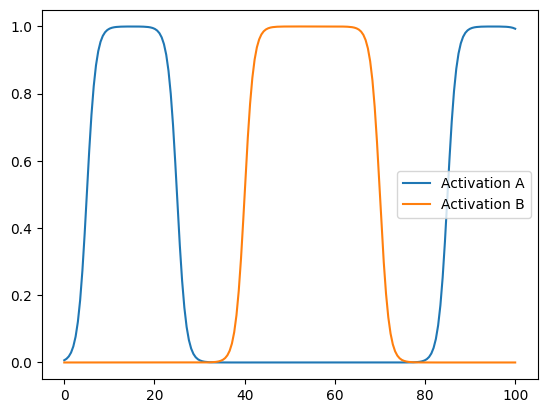

In [10]:
plt.plot(times, a_activation, label="Activation A")
plt.plot(times, b_activation, label="Activation B")
plt.legend()
tikzplotlib.save("../figurer/coupled_activation.tex")